In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import pandas as pd
import seaborn as sns
from pandas import ExcelWriter
from pandas import ExcelFile
import sample_utils

%matplotlib inline

# TRUE DATA

In [3]:
file_path = '2020_LER_20201021_testset.xlsx'

data = np.load('../data_handler/'+file_path+'.npy', allow_pickle=True)
num_in_cycle = [232, 289, 277, 253, 255, 250, 250, 250] 
num_of_cycle = 8
    
X_all, Y_all, X_per_cycle, Y_per_cycle = data[0], data[1], data[2], data[3]
print(data[0].shape, data[1].shape, data[2].shape, data[3].shape)
print()
test_real = Y_all

# for pair plot indexing
test_X_cycle = X_per_cycle

y_mean = np.mean(Y_all, axis=0, dtype=np.float32)
y_std = np.std(Y_all, axis=0, dtype=np.float32)

print("!! check !! test real shape", test_real.shape)
print("!! check !! X value ( especially its precision )")
print()
for i in range(num_of_cycle):
    print(test_X_cycle[i])

(2056, 5) (2056, 6) (8, 5) (8, 6)

!! check !! test real shape (2056, 6)
!! check !! X value ( especially its precision )

[  0.62484672  17.00743225 173.85718891   1.           0.        ]
[ 0.55654727 80.91905766 80.56986979  1.          0.        ]
[ 0.50466944 48.62398816 67.99380535  1.          0.        ]
[ 0.56045148 25.42868151 69.39740975  1.          0.        ]
[ 0.63730798 69.14860261 65.33037708  1.          0.        ]
[ 0.15273618 23.32639122 51.25326965  1.          0.        ]
[ 0.25925637 78.12653757 28.08679576  1.          0.        ]
[1.41144023e-01 9.67099798e+01 1.86683747e+02 1.00000000e+00
 0.00000000e+00]


# GENERATED DATA
### Please put your sampled data file(in .npy) in the same directory

In [4]:
########################################  CHANGE HERE ####################################################################

result = 'test_specificdate_201028_data_2020_LER_20201008_V008.xlsx_model_mlp_gan2_seed_0_lr_5e-05_0.0001_0.0005_hidden_dim_100_100_batch_size_25_noise_d_100_sample_num_250_pdrop_0.8.npy'

##########################################################################################################################

test_gen = np.load(result, allow_pickle=True)

test_gen = test_gen[:2000]
num_of_cycle = 8


test_gen_sample_num = int(test_gen.shape[0]/num_of_cycle)

print("test data sample num", test_gen_sample_num)
print("test data shape", test_gen.shape)


test data sample num 250
test data shape (2000, 6)


# EMD pdf

In [4]:
# EMD  

EMD_1d_score_list, EMD_2d_score_list = sample_utils.EMD_all_pair_each_X_pdf(generated_samples = test_gen, real_samples = test_real, num_coordinate=10, num_of_cycle=num_of_cycle, num_in_gen_list=[test_gen_sample_num]*num_of_cycle, num_in_real_list = num_in_cycle) 

print(EMD_1d_score_list.shape)
print(EMD_2d_score_list.shape)

EMD_score_cat = np.hstack((EMD_1d_score_list, EMD_2d_score_list))

EMD_score = np.mean(EMD_score_cat)
EMD_score_list_pdf = np.mean(EMD_score_cat,axis=1)
EMD_std = np.sqrt(np.mean((EMD_score - EMD_score_list_pdf)**2))

for i in range(len(EMD_score_list_pdf)):
    print("EMD_score for each X factor {} \t score {:5f} \t dev {:5f}".format(i, EMD_score_list_pdf[i], (EMD_score_list_pdf[i]-EMD_score)/EMD_std))
# A: Ioff, B: IDSat, C: IDlin, D: VTsat, E:VTlin, F:SS, G: classs

EMD_score_list = np.array(EMD_score_list_pdf)
 
print("EMD argsort: ", EMD_score_list.argsort())




(8, 6)
(8, 15)
EMD_score for each X factor 0 	 score 0.291581 	 dev -0.531895
EMD_score for each X factor 1 	 score 0.268461 	 dev -0.700141
EMD_score for each X factor 2 	 score 0.241680 	 dev -0.895031
EMD_score for each X factor 3 	 score 0.289977 	 dev -0.543569
EMD_score for each X factor 4 	 score 0.349515 	 dev -0.110298
EMD_score for each X factor 5 	 score 0.572904 	 dev 1.515332
EMD_score for each X factor 6 	 score 0.282739 	 dev -0.596238
EMD_score for each X factor 7 	 score 0.620520 	 dev 1.861840
EMD argsort:  [2 1 6 3 0 4 5 7]


# EMD integral

In [5]:
# EMD  

EMD_1d_score_list, EMD_2d_score_list = sample_utils.EMD_all_pair_each_X_integral(generated_samples = test_gen, real_samples = test_real, num_coordinate=10, num_of_cycle=num_of_cycle, num_in_gen_list=[test_gen_sample_num]*num_of_cycle, num_in_real_list = num_in_cycle) 

print(EMD_1d_score_list.shape)
print(EMD_2d_score_list.shape)

EMD_score_cat = np.hstack((EMD_1d_score_list, EMD_2d_score_list))

EMD_score = np.mean(EMD_score_cat)
EMD_score_list_integral = np.mean(EMD_score_cat,axis=1)
EMD_std = np.sqrt(np.mean((EMD_score - EMD_score_list_integral)**2))

for i in range(len(EMD_score_list_integral)):
    print("EMD_score for each X factor {} \t score {:5f} \t dev {:5f}".format(i, EMD_score_list_integral[i], (EMD_score_list_integral[i]-EMD_score)/EMD_std))
# A: Ioff, B: IDSat, C: IDlin, D: VTsat, E:VTlin, F:SS, G: classs

EMD_score_list = np.array(EMD_score_list_integral)
 
print("EMD argsort: ", EMD_score_list.argsort())

(8, 6)
(8, 15)
EMD_score for each X factor 0 	 score 0.296346 	 dev -0.602026
EMD_score for each X factor 1 	 score 0.254790 	 dev -0.874369
EMD_score for each X factor 2 	 score 0.248645 	 dev -0.914641
EMD_score for each X factor 3 	 score 0.317460 	 dev -0.463646
EMD_score for each X factor 4 	 score 0.397007 	 dev 0.057679
EMD_score for each X factor 5 	 score 0.621013 	 dev 1.525743
EMD_score for each X factor 6 	 score 0.308490 	 dev -0.522438
EMD_score for each X factor 7 	 score 0.661899 	 dev 1.793697
EMD argsort:  [2 1 0 6 3 4 5 7]


# GEN / REAL ( 개당 250개, 8set ) Pair plot

# 1. Custom scale


factor 0
0 232
Generated sample shape: (250, 6)
real sample shape: (232, 6)

Assigning class for visualization (generated: 0, real:1 )
generated sample class shape: (250, 1)
real sample class shape: (232, 1)
minimum y value for each varaible: [4.74700000e-13 3.09376101e-05 1.30100000e-05 3.23000000e-01
 3.33635087e-01 6.07650000e+01 0.00000000e+00]
maximum y value for each varaible: [7.47183363e-12 4.47500000e-05 1.84700000e-05 3.81009991e-01
 3.85519516e-01 6.35583594e+01 1.00000000e+00]
X input [  0.62484672  17.00743225 173.85718891   1.           0.        ]


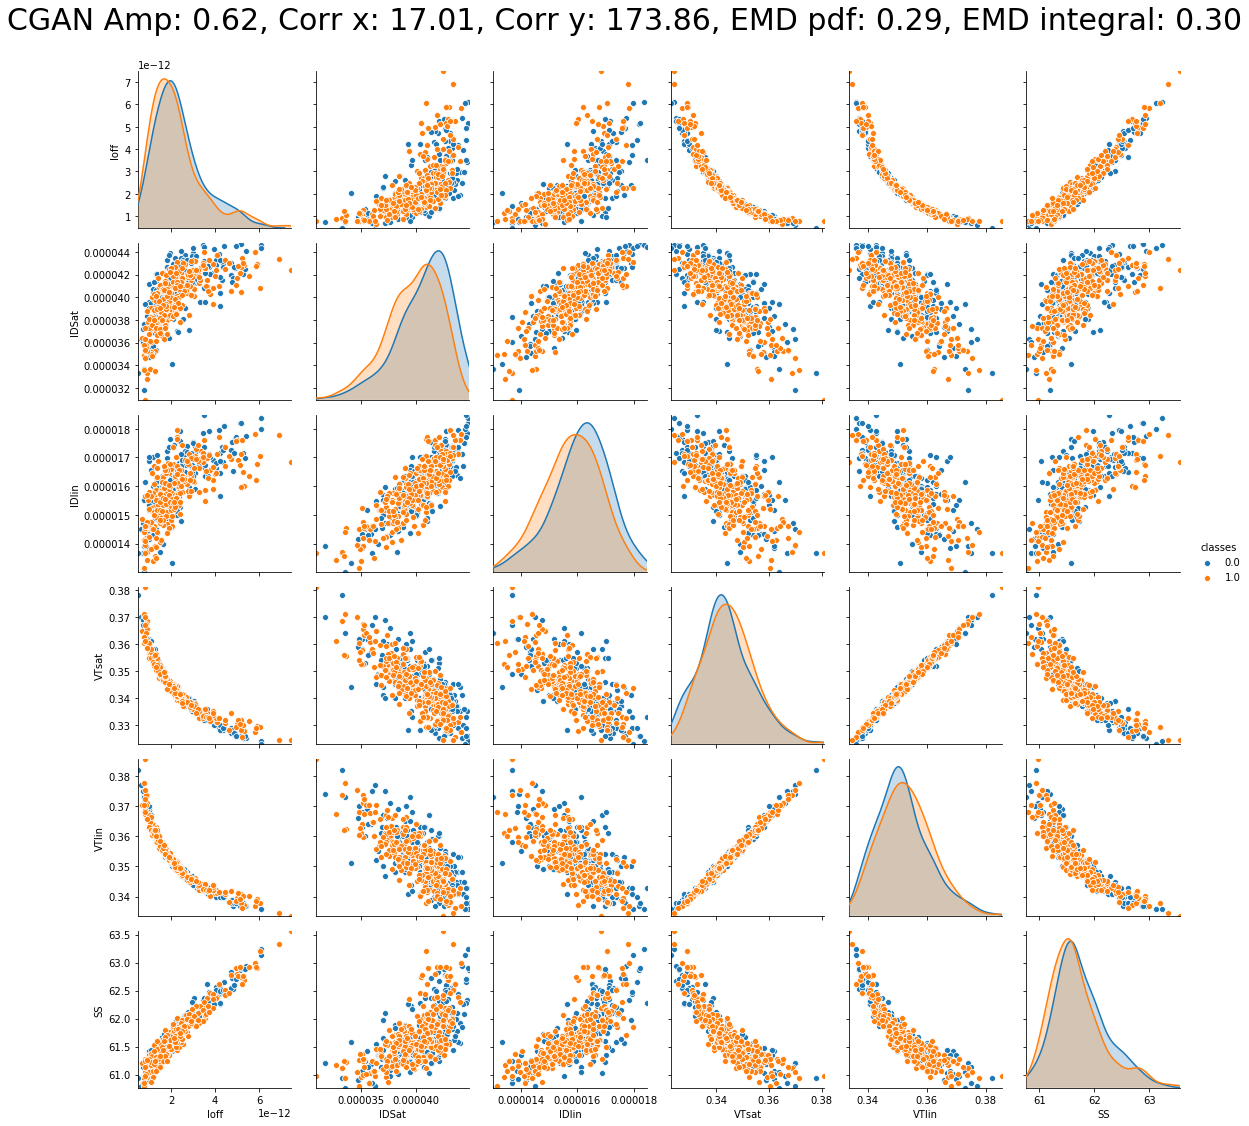

factor 1
232 521
Generated sample shape: (250, 6)
real sample shape: (289, 6)

Assigning class for visualization (generated: 0, real:1 )
generated sample class shape: (250, 1)
real sample class shape: (289, 1)
minimum y value for each varaible: [5.42962285e-13 3.18052754e-05 1.33150262e-05 3.24000000e-01
 3.36000000e-01 6.07570564e+01 0.00000000e+00]
maximum y value for each varaible: [6.20728285e-12 4.50700000e-05 1.82653110e-05 3.75255557e-01
 3.79207342e-01 6.30910000e+01 1.00000000e+00]
X input [ 0.55654727 80.91905766 80.56986979  1.          0.        ]


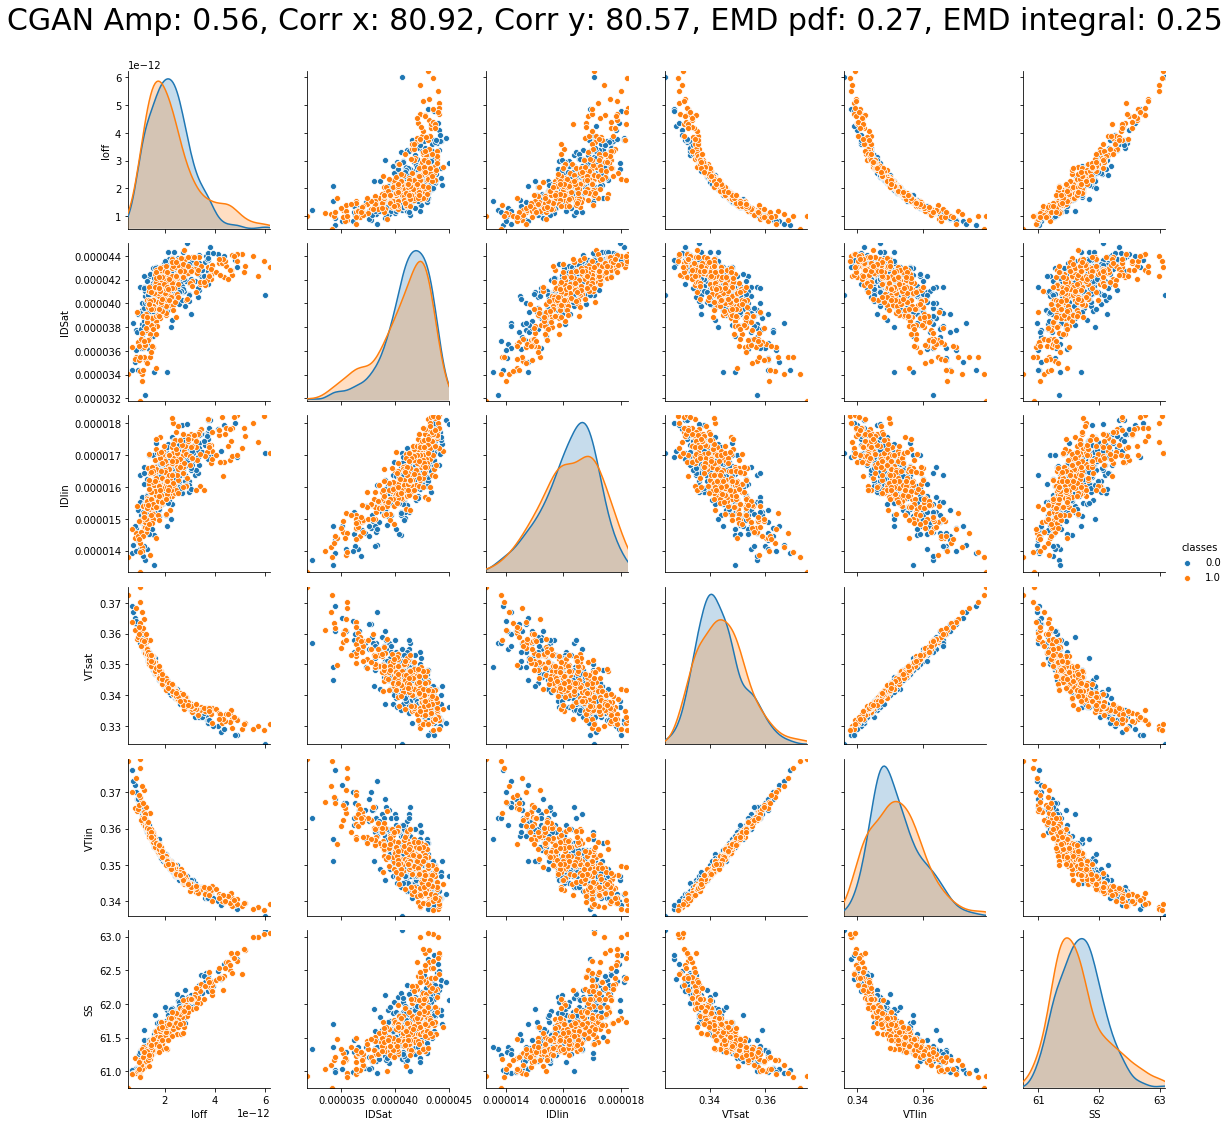

factor 2
521 798
Generated sample shape: (250, 6)
real sample shape: (277, 6)

Assigning class for visualization (generated: 0, real:1 )
generated sample class shape: (250, 1)
real sample class shape: (277, 1)
minimum y value for each varaible: [7.18100000e-13 3.26966207e-05 1.33044057e-05 3.25657413e-01
 3.35434382e-01 6.08530000e+01 0.00000000e+00]
maximum y value for each varaible: [7.90523042e-12 4.46500000e-05 1.87237938e-05 3.68000000e-01
 3.74514425e-01 6.36451226e+01 1.00000000e+00]
X input [ 0.50466944 48.62398816 67.99380535  1.          0.        ]


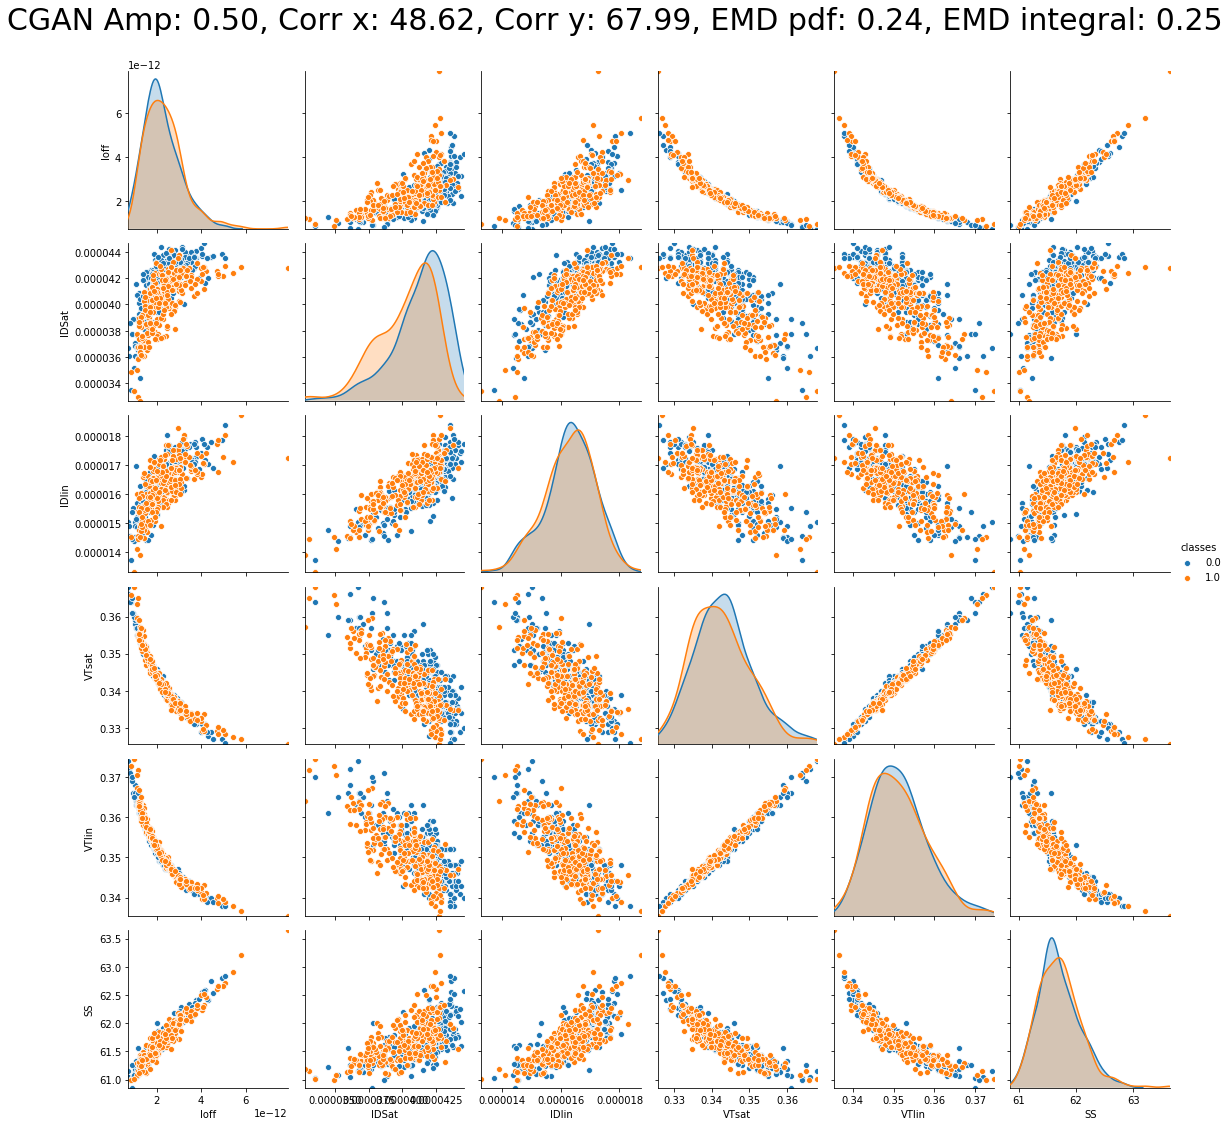

factor 3
798 1051
Generated sample shape: (250, 6)
real sample shape: (253, 6)

Assigning class for visualization (generated: 0, real:1 )
generated sample class shape: (250, 1)
real sample class shape: (253, 1)
minimum y value for each varaible: [5.98800000e-13 3.16500000e-05 1.29000000e-05 3.23000000e-01
 3.34947769e-01 6.08810000e+01 0.00000000e+00]
maximum y value for each varaible: [6.82612366e-12 4.45500000e-05 1.83012535e-05 3.74093273e-01
 3.78303092e-01 6.32832149e+01 1.00000000e+00]
X input [ 0.56045148 25.42868151 69.39740975  1.          0.        ]


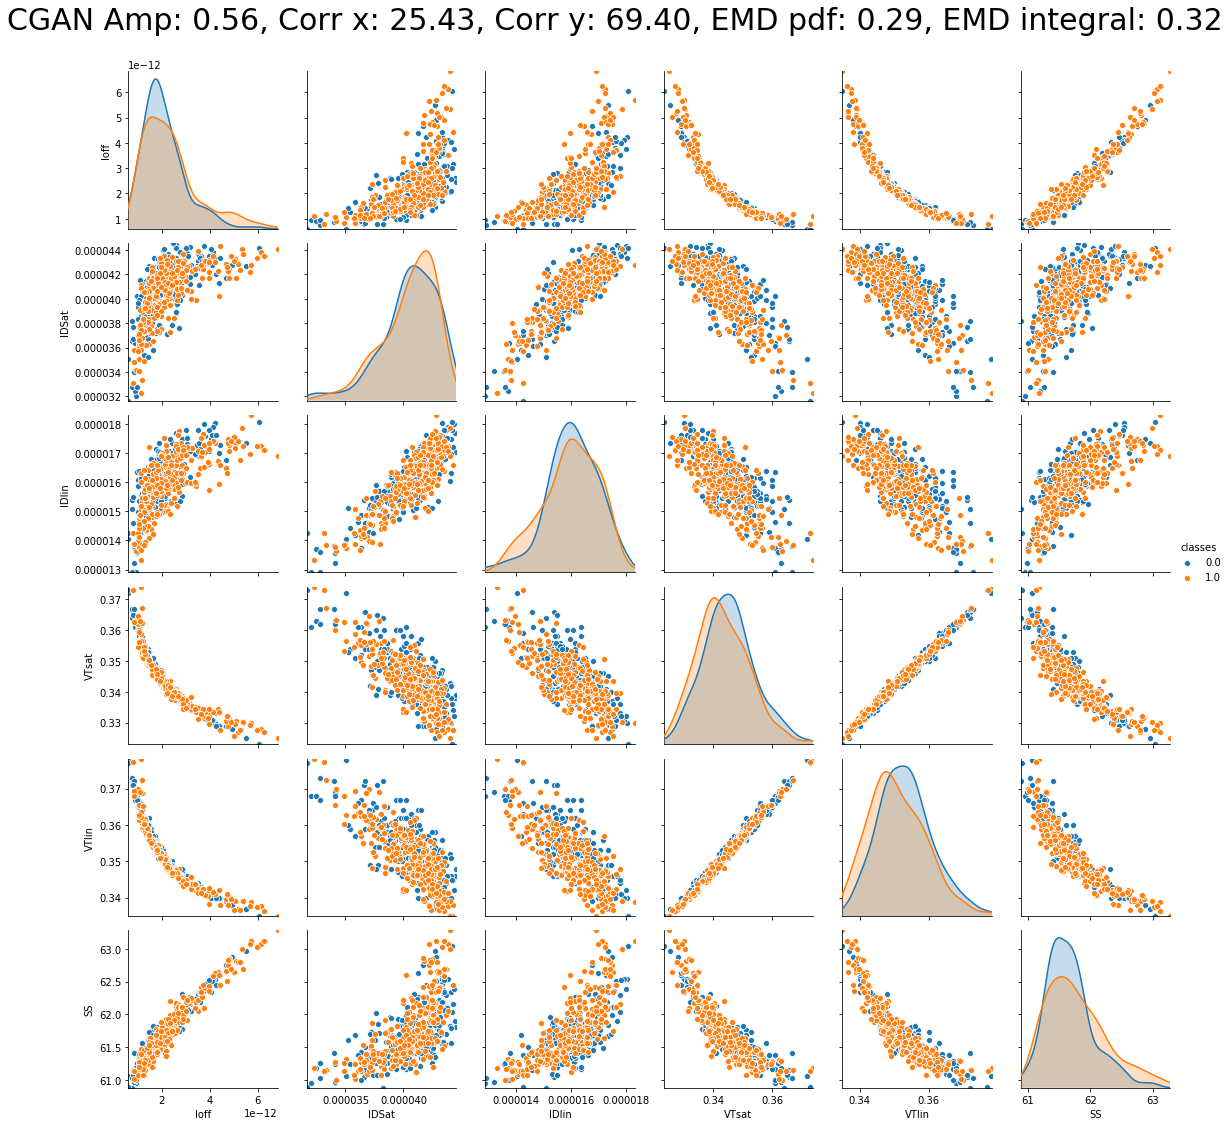

factor 4
1051 1306
Generated sample shape: (250, 6)
real sample shape: (255, 6)

Assigning class for visualization (generated: 0, real:1 )
generated sample class shape: (250, 1)
real sample class shape: (255, 1)
minimum y value for each varaible: [3.02200000e-13 2.80400000e-05 1.15000000e-05 3.21240113e-01
 3.35000000e-01 6.08140000e+01 0.00000000e+00]
maximum y value for each varaible: [8.15029140e-12 4.49600000e-05 1.83400000e-05 3.94000000e-01
 3.97000000e-01 6.37994038e+01 1.00000000e+00]
X input [ 0.63730798 69.14860261 65.33037708  1.          0.        ]


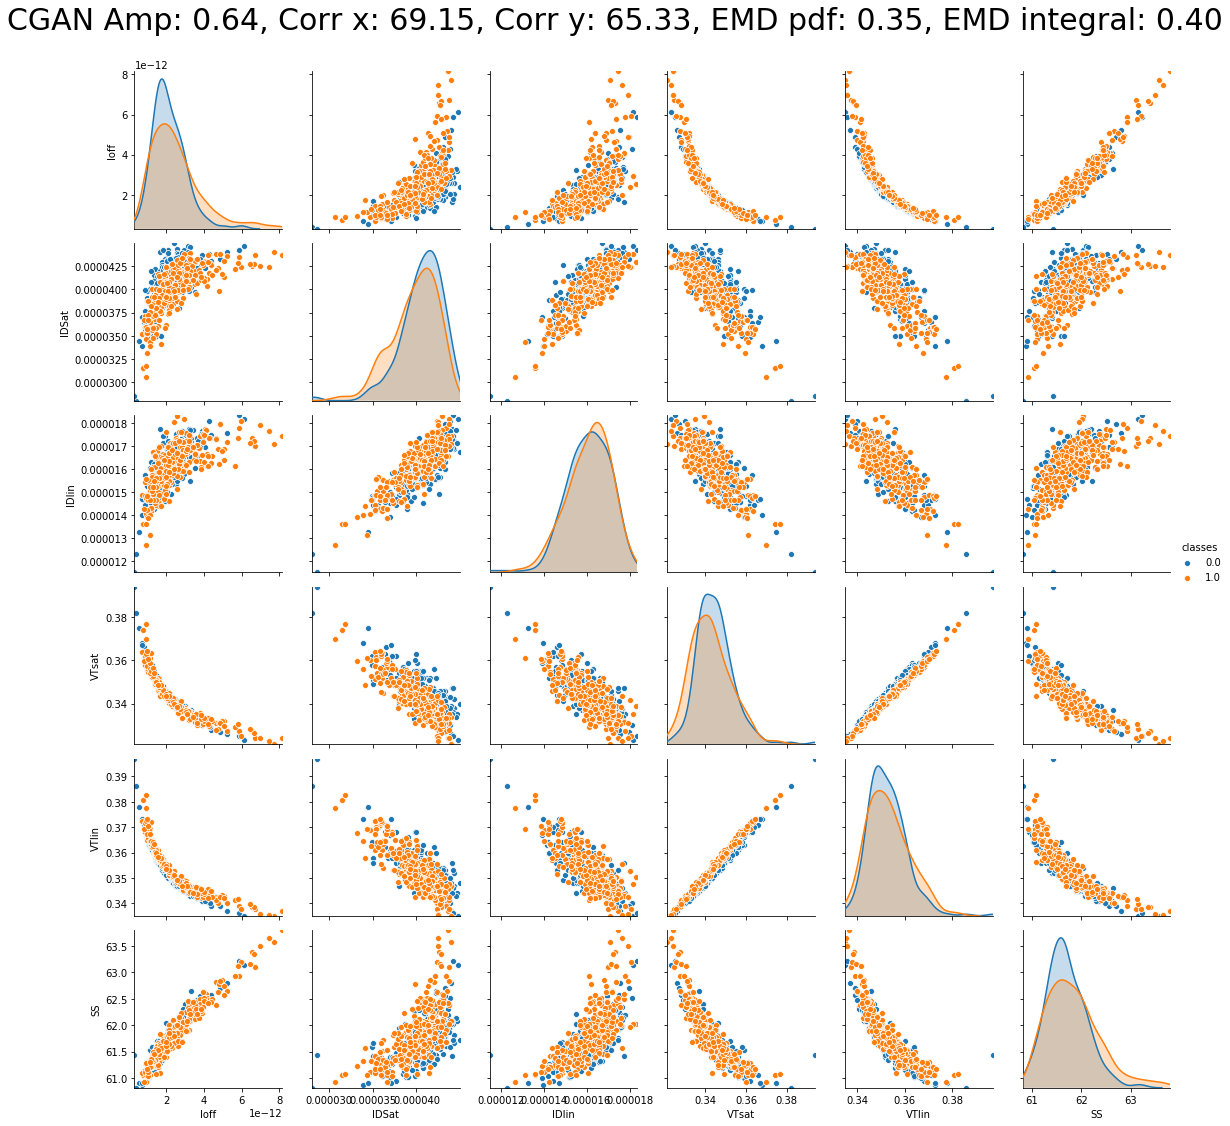

factor 5
1306 1556
Generated sample shape: (250, 6)
real sample shape: (250, 6)

Assigning class for visualization (generated: 0, real:1 )
generated sample class shape: (250, 1)
real sample class shape: (250, 1)
minimum y value for each varaible: [1.60200000e-12 4.05422281e-05 1.58000000e-05 3.33527379e-01
 3.42897626e-01 6.13550000e+01 0.00000000e+00]
maximum y value for each varaible: [3.01036220e-12 4.41813411e-05 1.76308989e-05 3.48171912e-01
 3.55271917e-01 6.20343709e+01 1.00000000e+00]
X input [ 0.15273618 23.32639122 51.25326965  1.          0.        ]


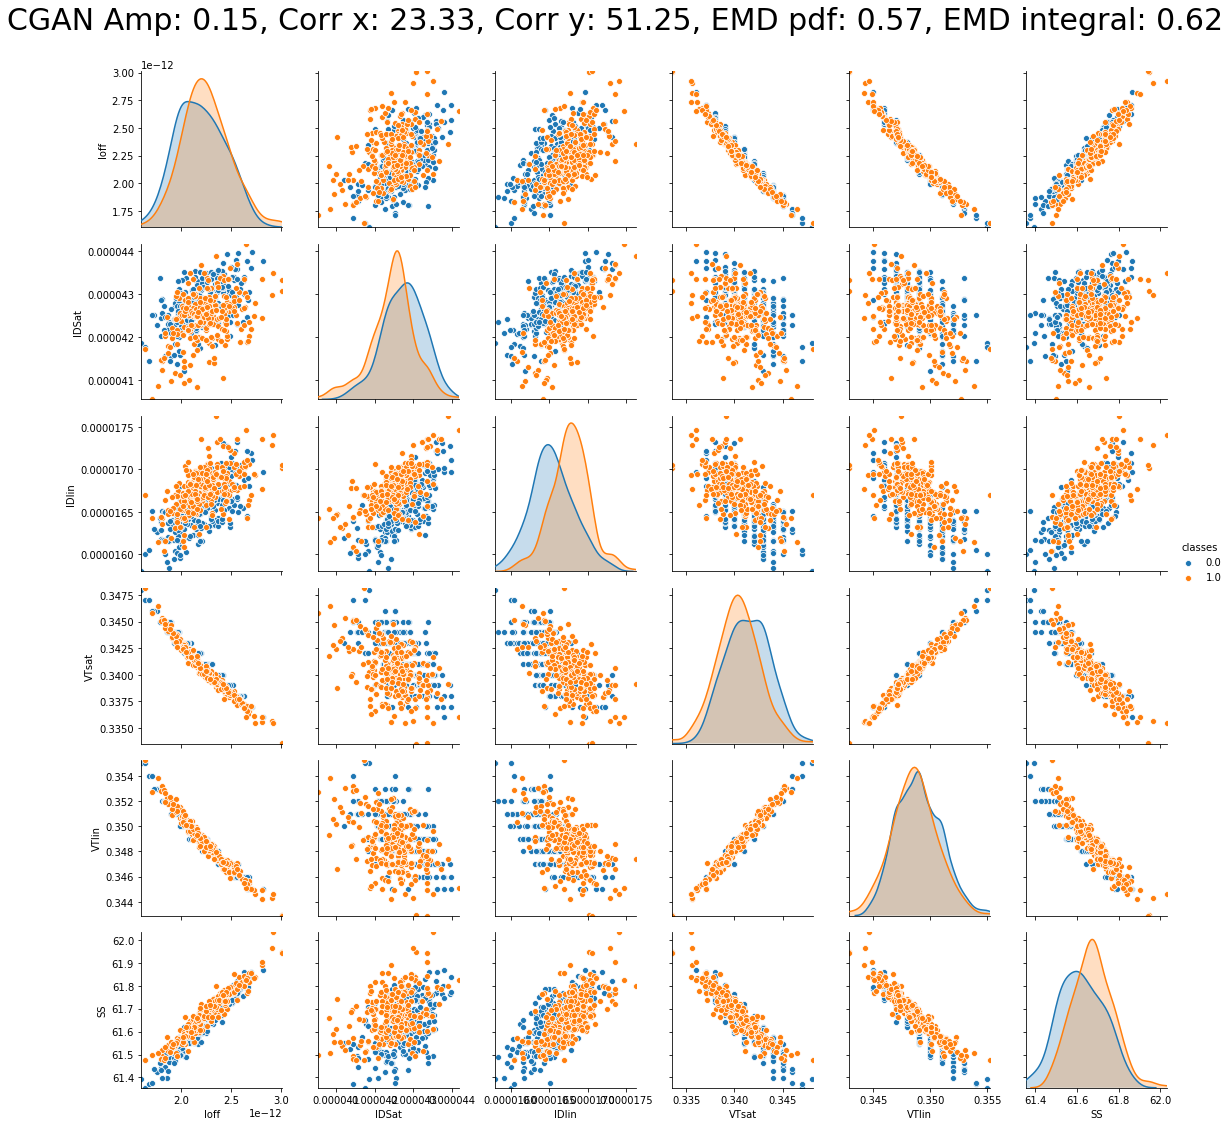

factor 6
1556 1806
Generated sample shape: (250, 6)
real sample shape: (250, 6)

Assigning class for visualization (generated: 0, real:1 )
generated sample class shape: (250, 1)
real sample class shape: (250, 1)
minimum y value for each varaible: [1.28794147e-12 3.91500000e-05 1.53400000e-05 3.33000000e-01
 3.41751403e-01 6.12394584e+01 0.00000000e+00]
maximum y value for each varaible: [3.48000000e-12 4.45600000e-05 1.77753201e-05 3.53710480e-01
 3.59406467e-01 6.21800000e+01 1.00000000e+00]
X input [ 0.25925637 78.12653757 28.08679576  1.          0.        ]


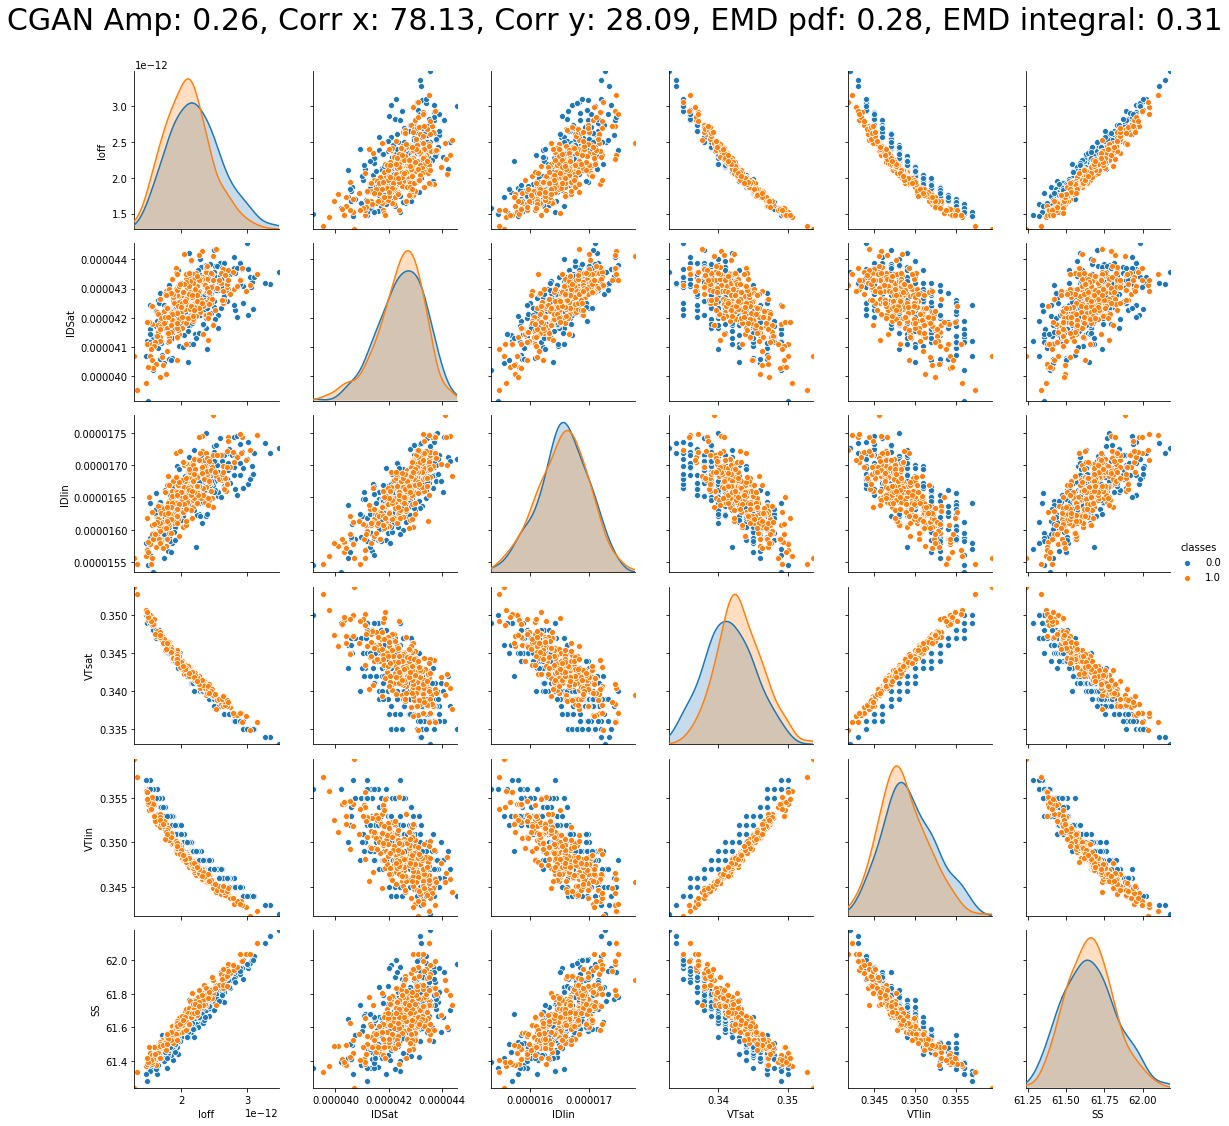

factor 7
1806 2056
Generated sample shape: (250, 6)
real sample shape: (250, 6)

Assigning class for visualization (generated: 0, real:1 )
generated sample class shape: (250, 1)
real sample class shape: (250, 1)
minimum y value for each varaible: [1.45534392e-12 3.91500000e-05 1.53400000e-05 3.33000000e-01
 3.42000000e-01 6.12830000e+01 0.00000000e+00]
maximum y value for each varaible: [3.48000000e-12 4.45600000e-05 1.77317448e-05 3.50215473e-01
 3.57000000e-01 6.21800000e+01 1.00000000e+00]
X input [1.41144023e-01 9.67099798e+01 1.86683747e+02 1.00000000e+00
 0.00000000e+00]


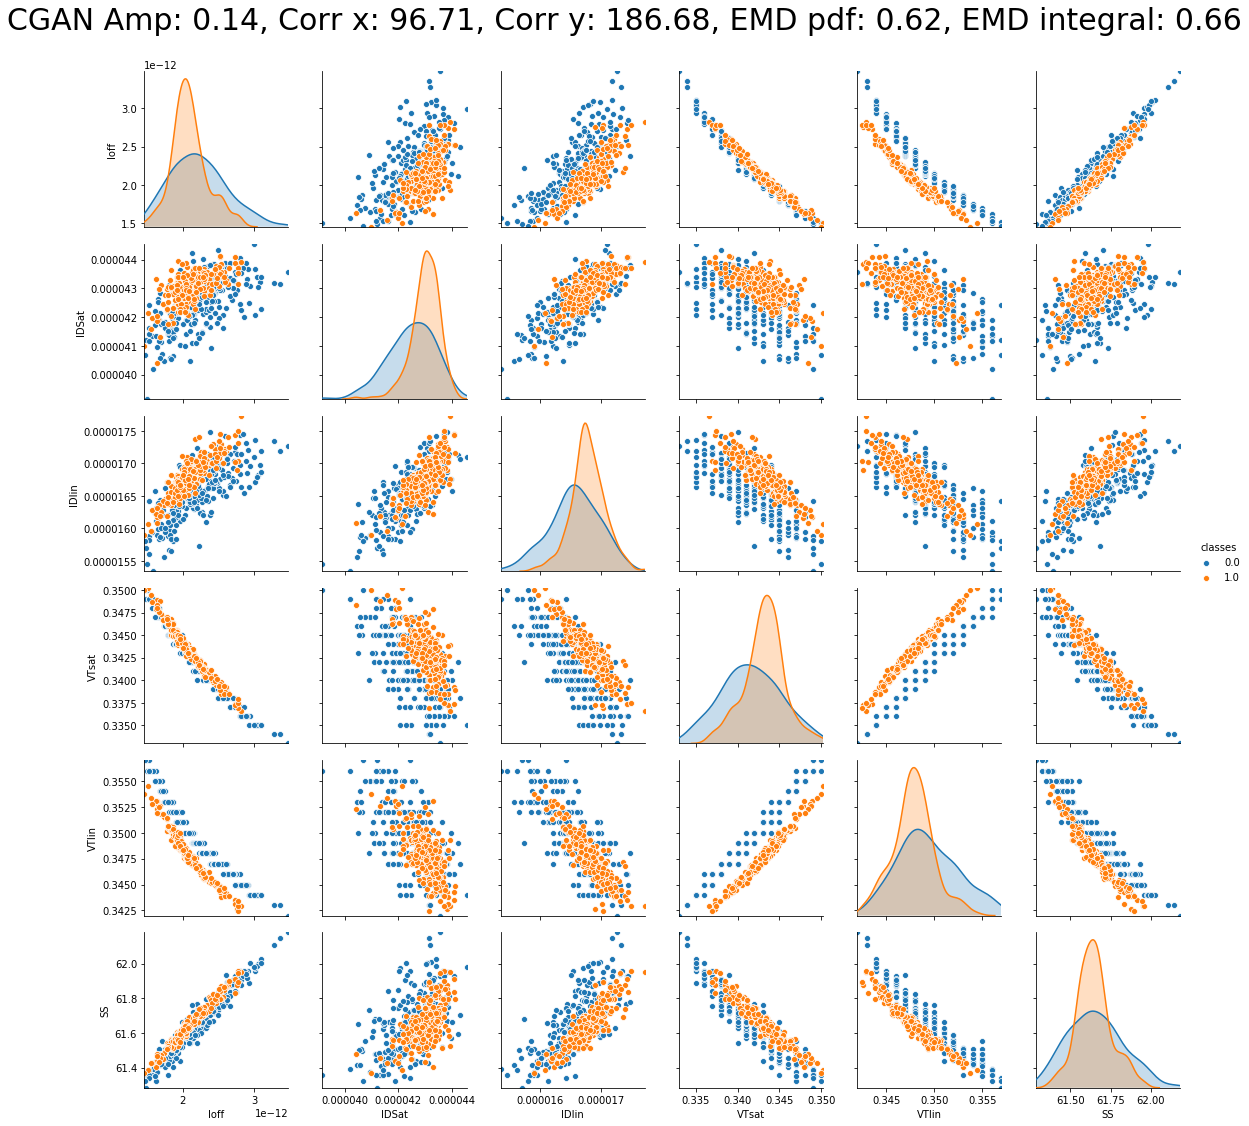

In [6]:
# gen_factor = 7
# test_sample_num = int(total_result_test.shape[0]/15)
# test_gan_matrix_plot = total_result_test[gen_factor * test_sample_num:(gen_factor+1)*test_sample_num]

for factor in range(num_of_cycle):
    
    print("factor", factor)

    ##############################################################################################################
    """
    for i in range(6):
        print(np.min(total_result[:,i]))
        print(np.max(total_result[:,i]))
        print(np.min(real[:,i]))
        print(np.max(real[:,i]))
    """

    # generated sample
    print(sum(num_in_cycle[:factor]),sum(num_in_cycle[:factor])+num_in_cycle[factor])
    test_gan_matrix_plot = test_gen[factor * test_gen_sample_num:(factor+1)*test_gen_sample_num]
    print("Generated sample shape:", test_gan_matrix_plot.shape)

    # real sample
    test_real_matrix_plot = test_real[sum(num_in_cycle[:factor]):sum(num_in_cycle[:factor])+num_in_cycle[factor]]
    print("real sample shape:", test_real_matrix_plot.shape)
    print()

    # Assigning class(generated: 0, real:1 ) for visualization

    print("Assigning class for visualization (generated: 0, real:1 )")

    test_gan_cls = np.ones((test_gen_sample_num, 1))
    print("generated sample class shape:", test_gan_cls.shape)
    test_real_cls = np.zeros((num_in_cycle[factor], 1))
    print("real sample class shape:", test_real_cls.shape)

    test_temp1 = np.hstack([test_gan_matrix_plot, test_gan_cls])
    test_temp2 = np.hstack([test_real_matrix_plot, test_real_cls])

    # TOTAL PANDAS DATA
    total_test_matrix_plot = np.vstack([test_temp1, test_temp2])
    # print(total_matrix_plot.shape)

    # A: Ioff, B: IDSat, C: IDlin, D: VTsat, E:VTlin, F:SS, G: classes
    df1_test = pd.DataFrame(total_test_matrix_plot, columns=['Ioff', 'IDSat',  'IDlin',  'VTsat', 'VTlin', 'SS', 'classes'])
    # print(df1)

#    print(df1_test)
    
        # min, max for generated Y value ( used for scatter plot limit standard )

    test_min_list = total_test_matrix_plot.min(axis=0)
    test_max_list = total_test_matrix_plot.max(axis=0)
    print("minimum y value for each varaible:", test_min_list)
    print("maximum y value for each varaible:", test_max_list)

    X_test = X_per_cycle[factor]

    print("X input", X_test)

    g = sns.pairplot(df1_test, hue = 'classes')
    for i in range(6):
        g.fig.suptitle("CGAN Amp: {:.2f}, Corr x: {:.2f}, Corr y: {:.2f}, EMD pdf: {:.2f}, EMD integral: {:.2f}".format(X_test[0], X_test[1], X_test[2], EMD_score_list_pdf[factor], EMD_score_list_integral[factor]), y=1.04, fontsize=30)
        g.axes[i,i].set_xlim((test_min_list[i],test_max_list[i]))
        g.axes[i,i].set_ylim((test_min_list[i],test_max_list[i]))
    
    plt.tight_layout()
    plt.savefig('figures/Test_Custom_factor_{}_sample_{}.pdf'.format(factor, test_gen_sample_num), bbox_inches='tight')
    
    plt.show()


    ### 파란색이 real 주황색이 generated

# 2. Same scale

minimum y value for each varaible: [3.0220e-13 2.8040e-05 1.1500e-05 3.2300e-01 3.3500e-01 6.0765e+01]
maximum y value for each varaible: [6.1180e-12 4.5070e-05 1.8470e-05 3.9400e-01 3.9700e-01 6.3242e+01]
minimum y value for each varaible: [5.42962285e-13 3.06296228e-05 1.26885756e-05 3.21240113e-01
 3.33635087e-01 6.07570564e+01]
maximum y value for each varaible: [8.15029140e-12 4.44965784e-05 1.87237938e-05 3.81009991e-01
 3.85519516e-01 6.37994038e+01]
factor 0
0 232
Generated sample shape: (250, 6)
real sample shape: (232, 6)

Assigning class for visualization (generated: 0, real:1 )
generated sample class shape: (250, 1)
real sample class shape: (232, 1)
X input [  0.62484672  17.00743225 173.85718891   1.           0.        ]


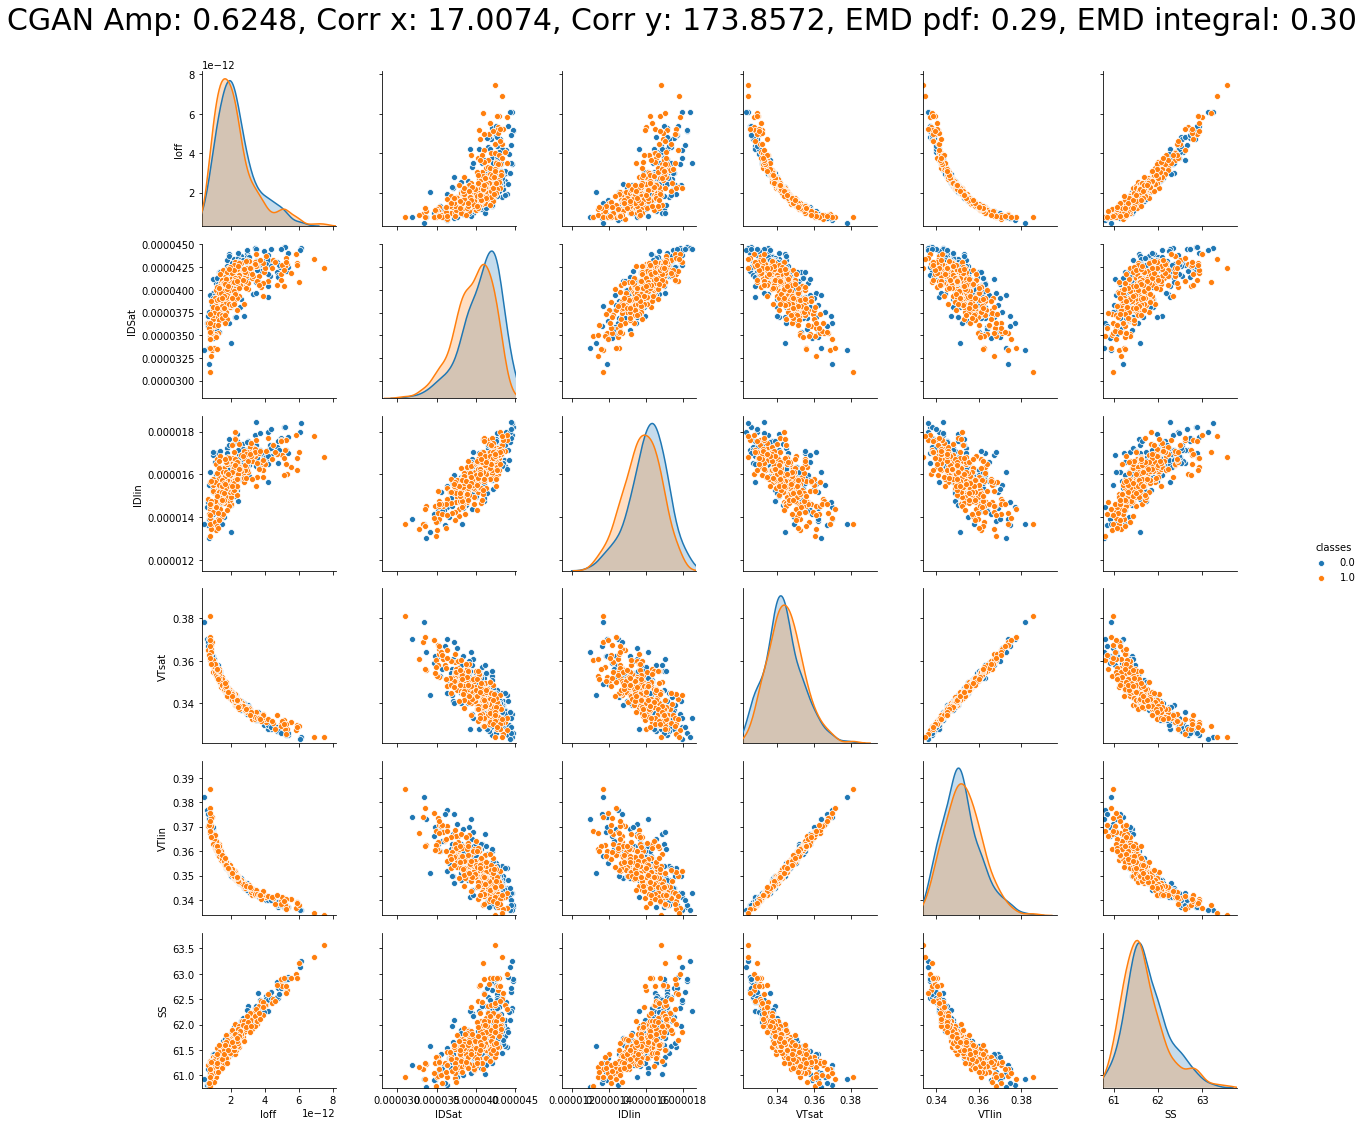

factor 1
232 521
Generated sample shape: (250, 6)
real sample shape: (289, 6)

Assigning class for visualization (generated: 0, real:1 )
generated sample class shape: (250, 1)
real sample class shape: (289, 1)
X input [ 0.55654727 80.91905766 80.56986979  1.          0.        ]


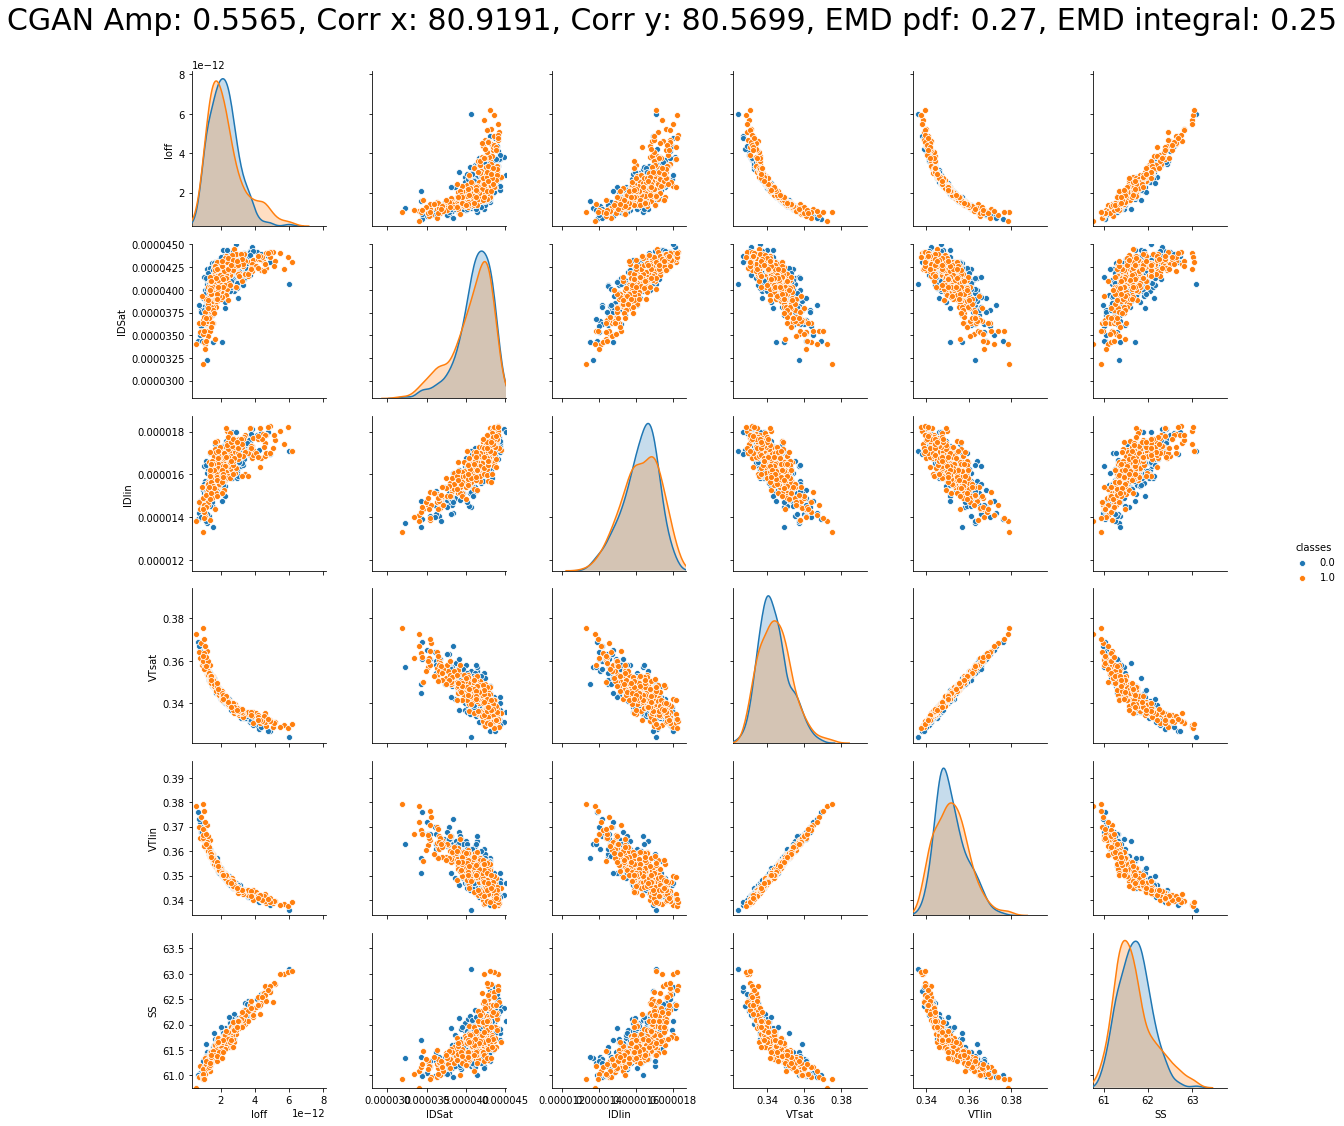

factor 2
521 798
Generated sample shape: (250, 6)
real sample shape: (277, 6)

Assigning class for visualization (generated: 0, real:1 )
generated sample class shape: (250, 1)
real sample class shape: (277, 1)
X input [ 0.50466944 48.62398816 67.99380535  1.          0.        ]


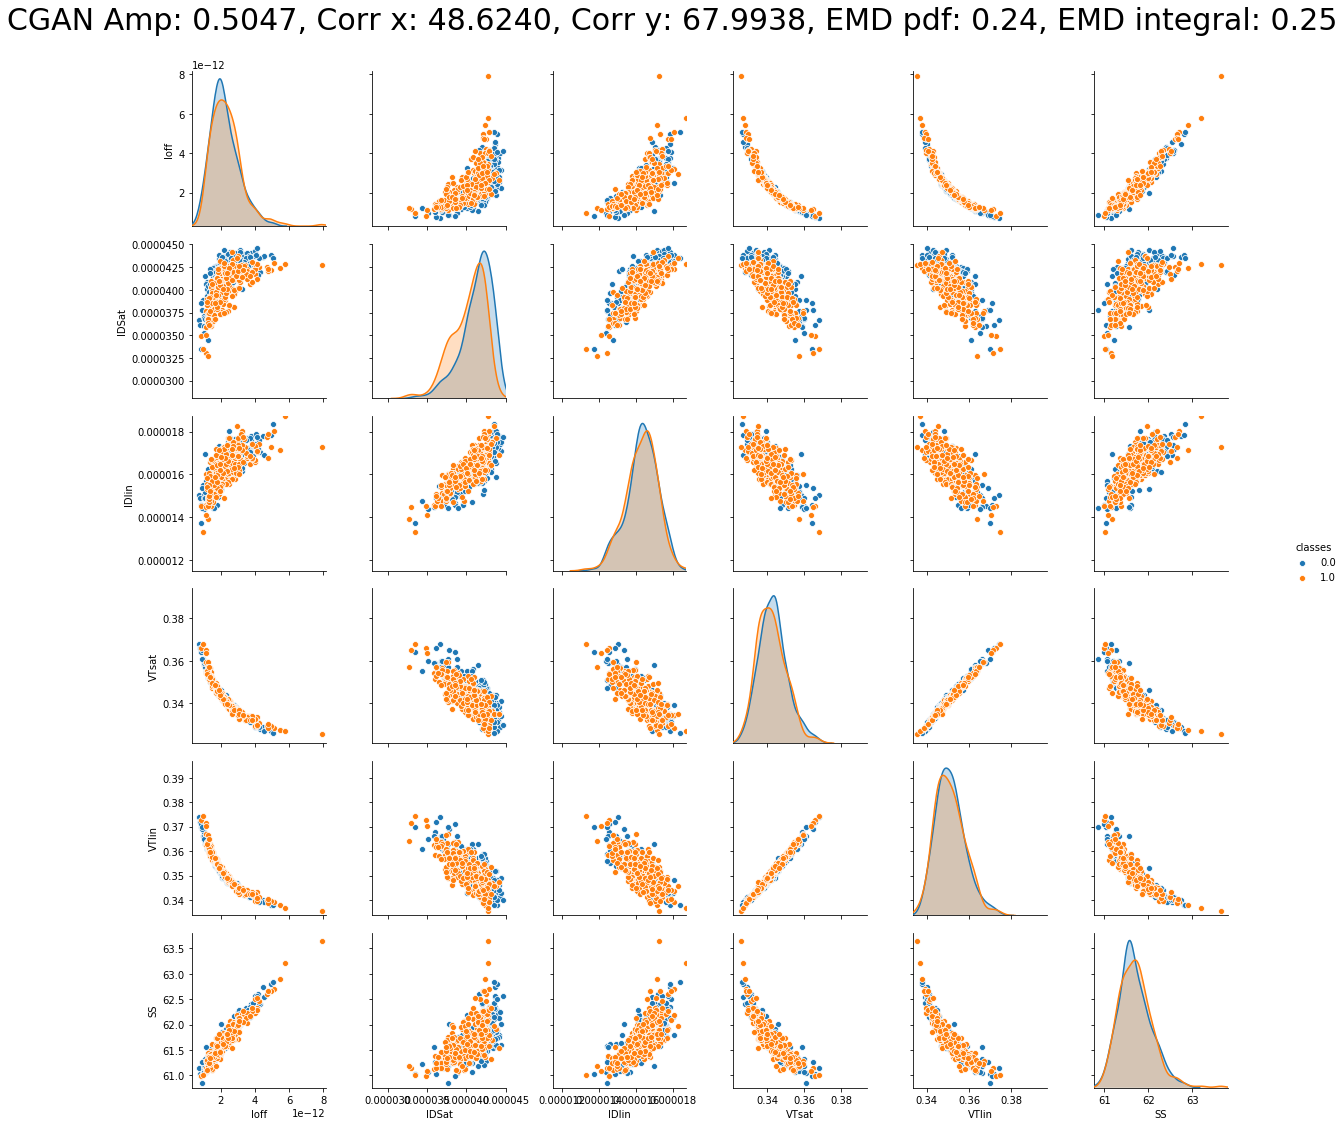

factor 3
798 1051
Generated sample shape: (250, 6)
real sample shape: (253, 6)

Assigning class for visualization (generated: 0, real:1 )
generated sample class shape: (250, 1)
real sample class shape: (253, 1)
X input [ 0.56045148 25.42868151 69.39740975  1.          0.        ]


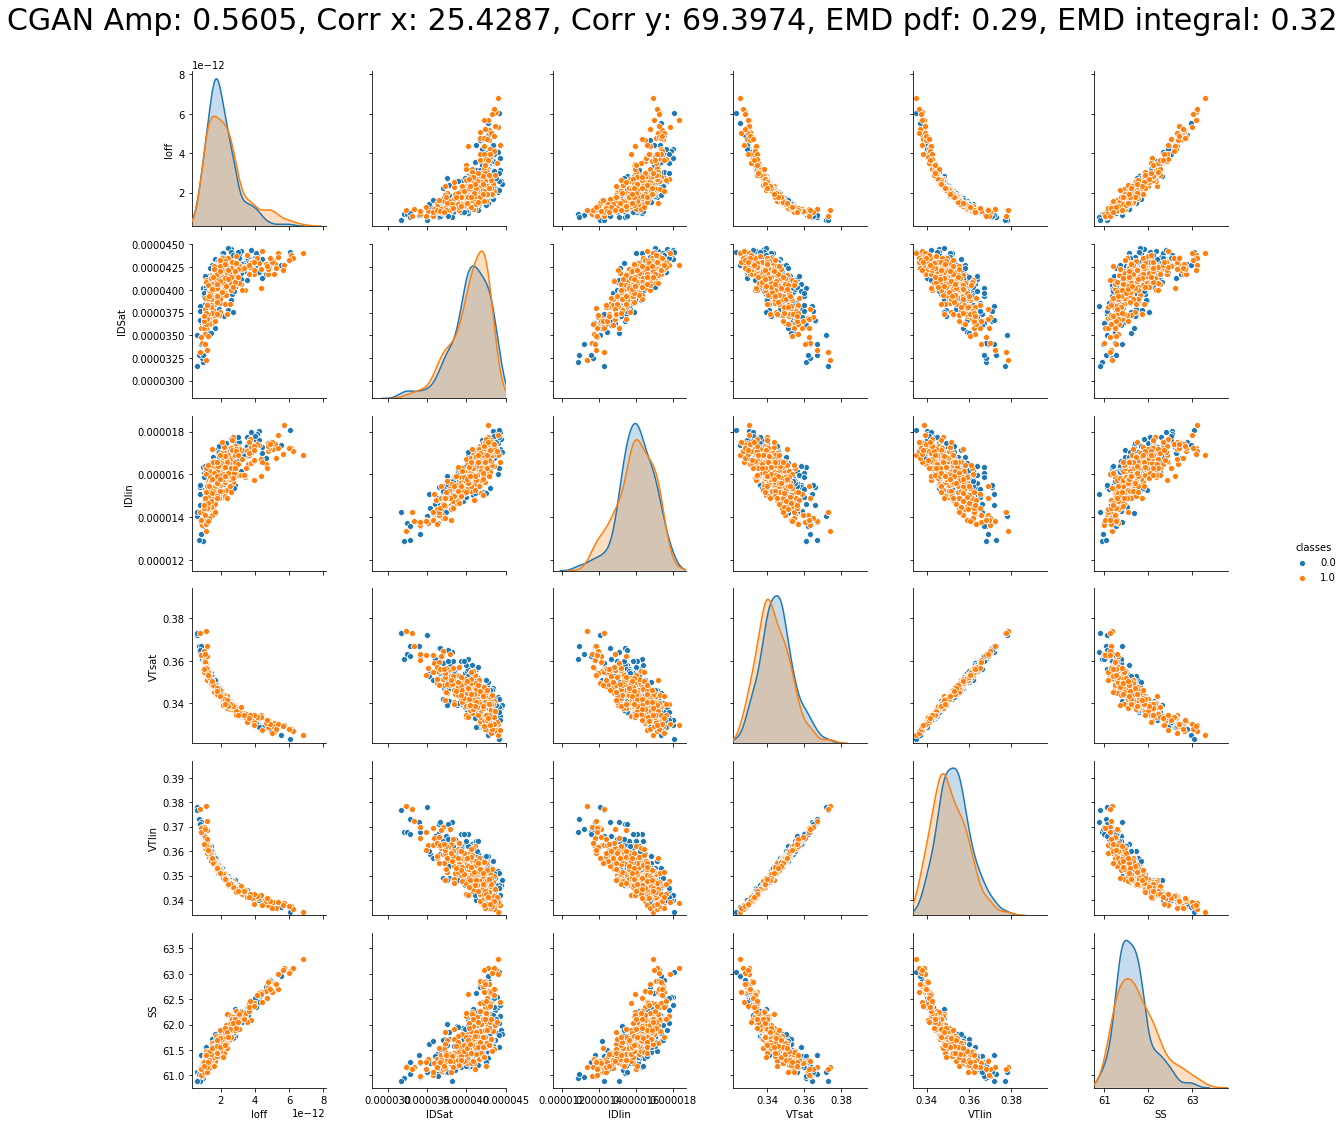

factor 4
1051 1306
Generated sample shape: (250, 6)
real sample shape: (255, 6)

Assigning class for visualization (generated: 0, real:1 )
generated sample class shape: (250, 1)
real sample class shape: (255, 1)
X input [ 0.63730798 69.14860261 65.33037708  1.          0.        ]


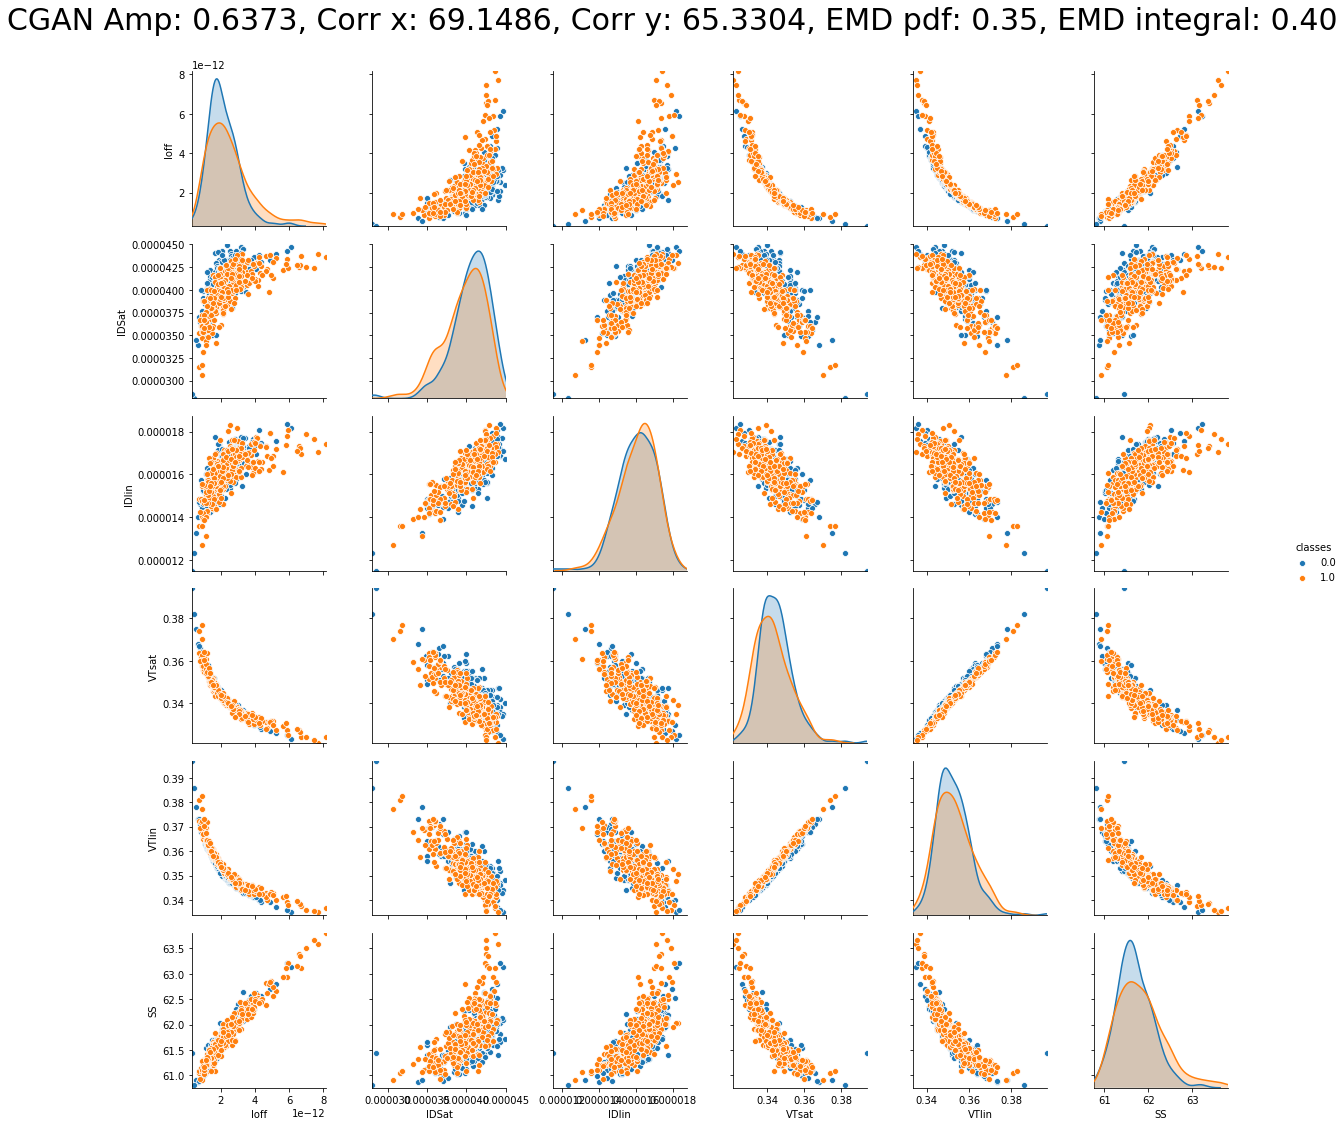

factor 5
1306 1556
Generated sample shape: (250, 6)
real sample shape: (250, 6)

Assigning class for visualization (generated: 0, real:1 )
generated sample class shape: (250, 1)
real sample class shape: (250, 1)
X input [ 0.15273618 23.32639122 51.25326965  1.          0.        ]


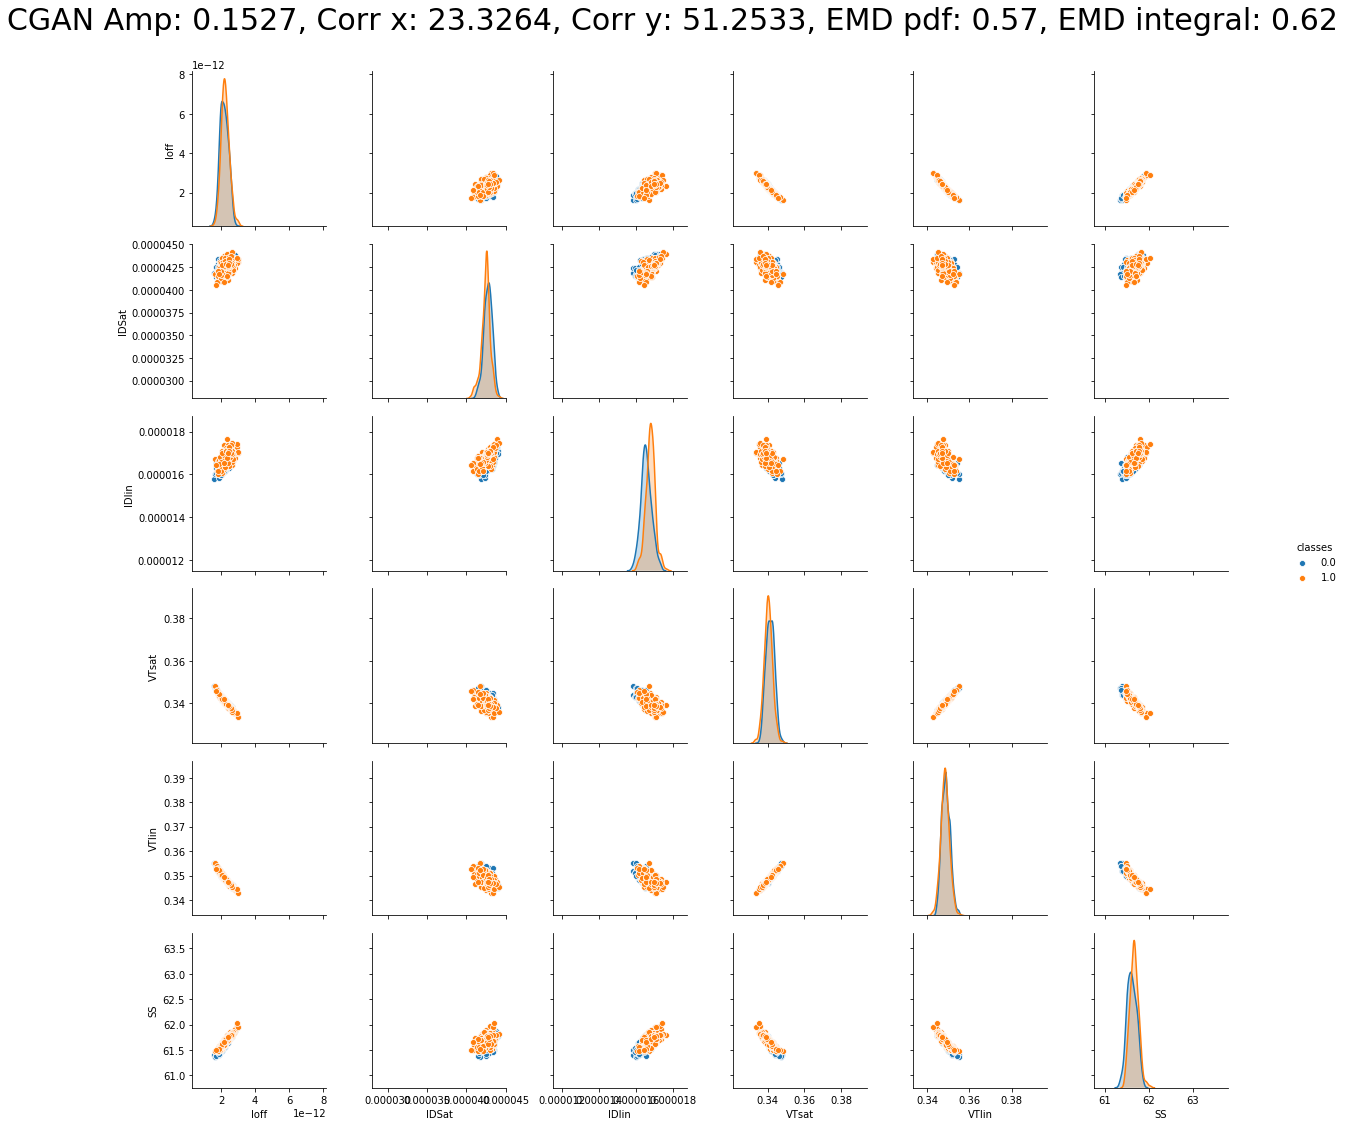

factor 6
1556 1806
Generated sample shape: (250, 6)
real sample shape: (250, 6)

Assigning class for visualization (generated: 0, real:1 )
generated sample class shape: (250, 1)
real sample class shape: (250, 1)
X input [ 0.25925637 78.12653757 28.08679576  1.          0.        ]


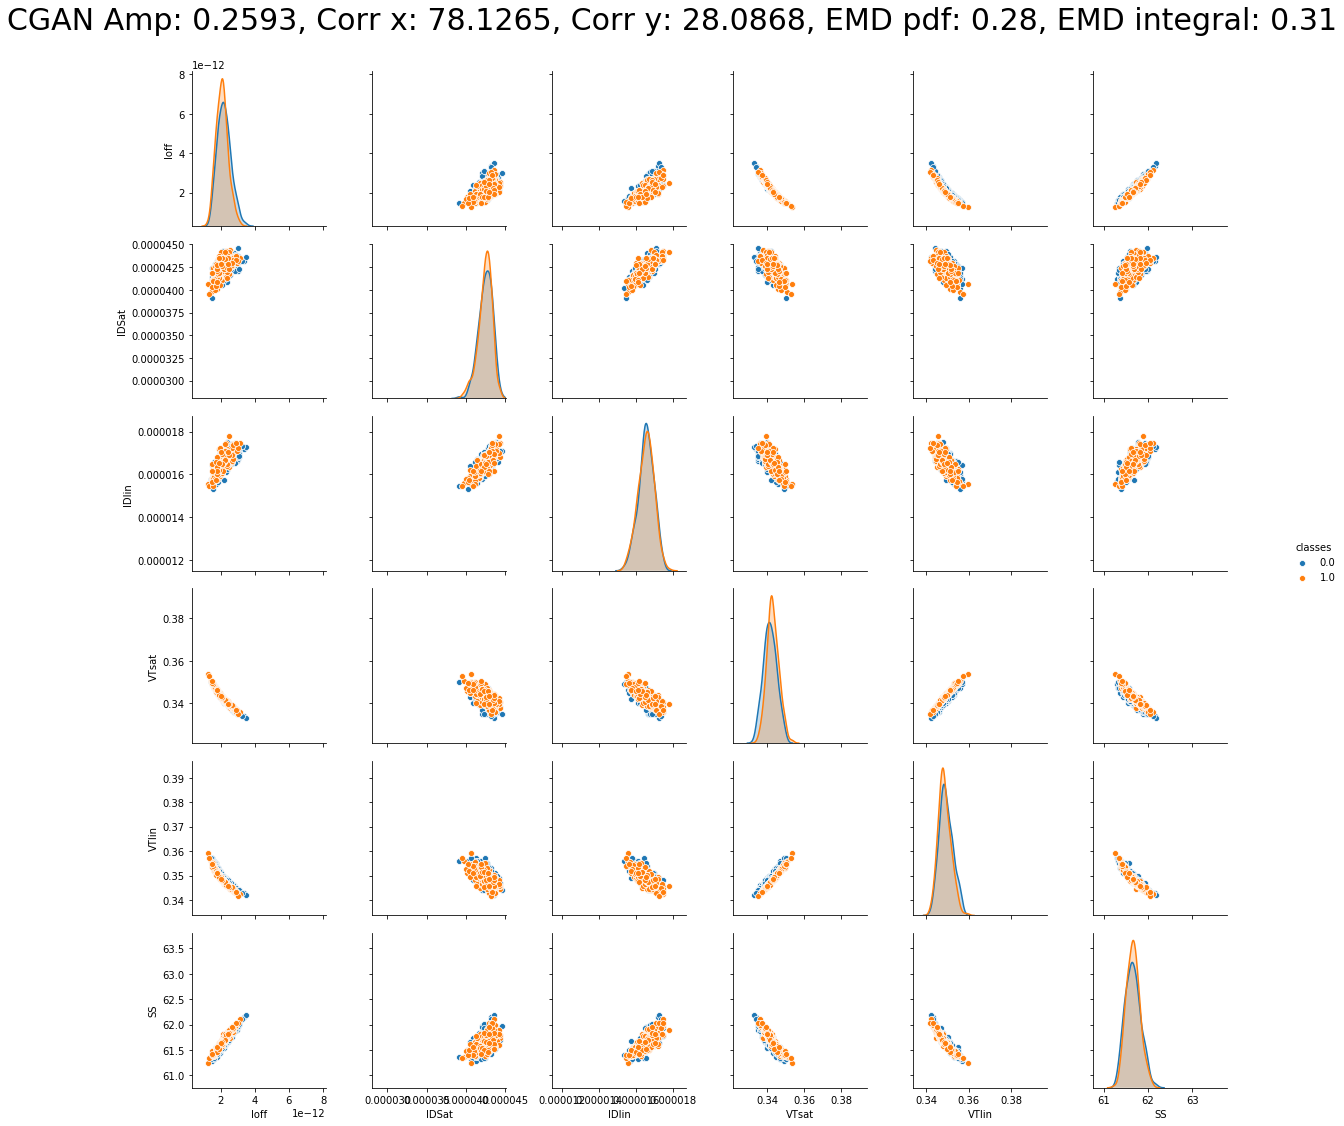

factor 7
1806 2056
Generated sample shape: (250, 6)
real sample shape: (250, 6)

Assigning class for visualization (generated: 0, real:1 )
generated sample class shape: (250, 1)
real sample class shape: (250, 1)
X input [1.41144023e-01 9.67099798e+01 1.86683747e+02 1.00000000e+00
 0.00000000e+00]


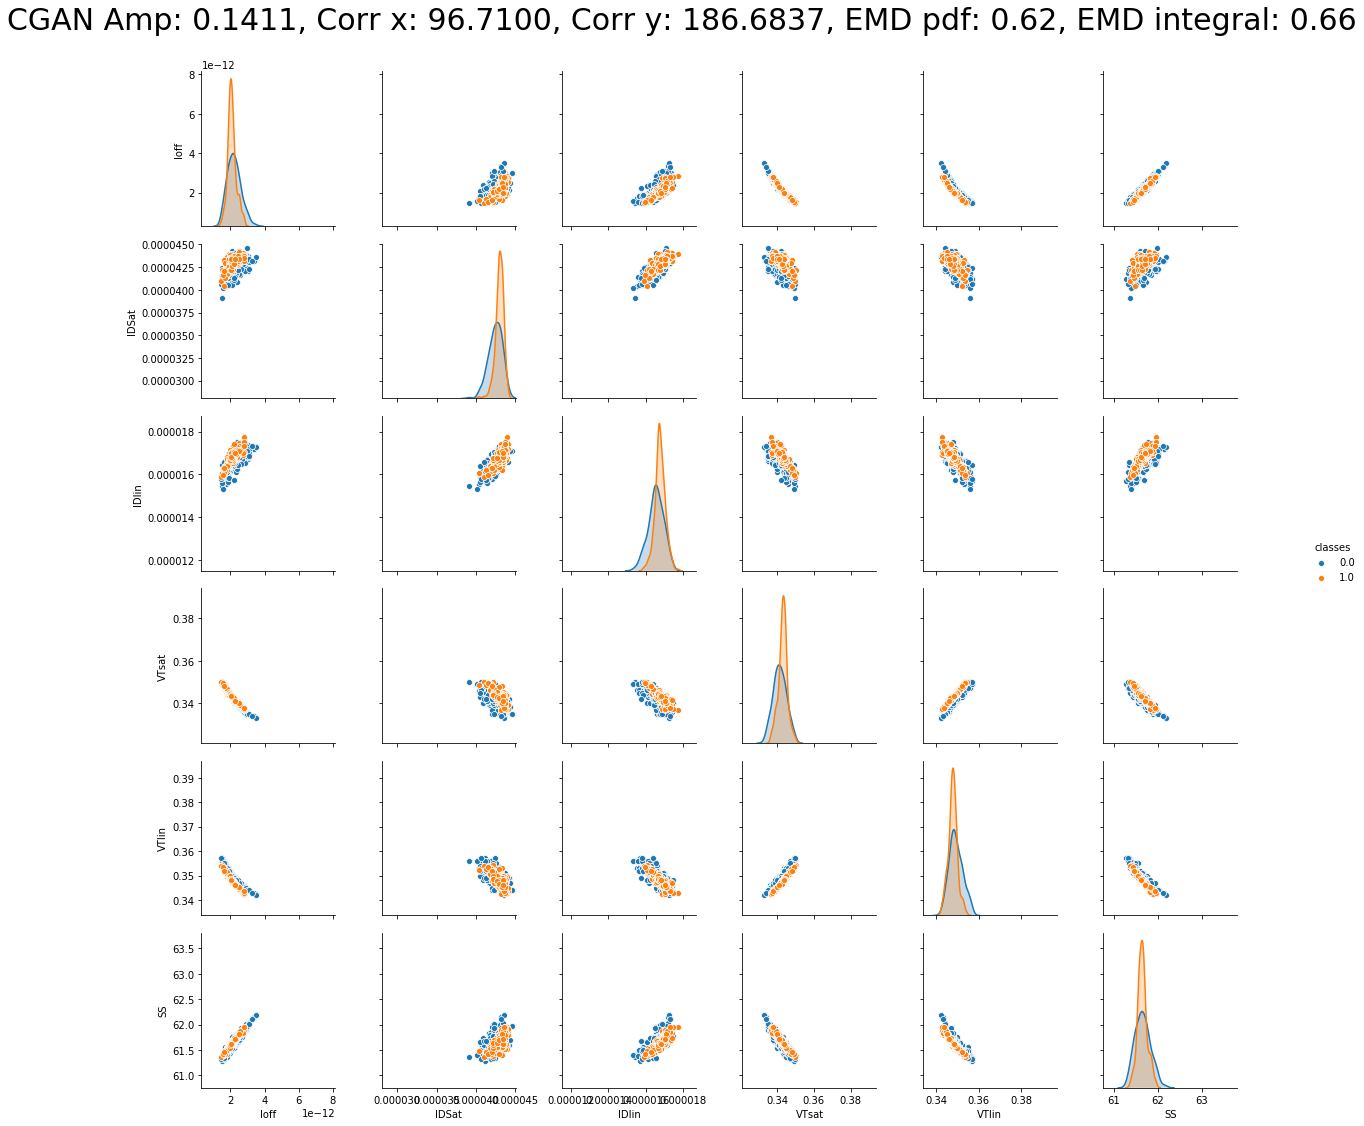

In [9]:

min1_per_out_v = test_real.min(axis=0)
max1_per_out_v = test_real.max(axis=0)
print("minimum y value for each varaible:", min1_per_out_v)
print("maximum y value for each varaible:", max1_per_out_v)

min2_per_out_v = test_gen.min(axis=0)
max2_per_out_v = test_gen.max(axis=0)
print("minimum y value for each varaible:", min2_per_out_v)
print("maximum y value for each varaible:", max2_per_out_v)

min_per_out_v = []
max_per_out_v = []

for i in range(6):
    min_per_out_v.append(min1_per_out_v[i] if min1_per_out_v[i] < min2_per_out_v[i] else min2_per_out_v[i])
    max_per_out_v.append(max1_per_out_v[i] if max1_per_out_v[i] > max2_per_out_v[i] else max2_per_out_v[i])

    
for factor in range(num_of_cycle):
    
    print("factor", factor)

    ##############################################################################################################
    """
    for i in range(6):
        print(np.min(total_result[:,i]))
        print(np.max(total_result[:,i]))
        print(np.min(real[:,i]))
        print(np.max(real[:,i]))
    """

    # generated sample
    print(sum(num_in_cycle[:factor]),sum(num_in_cycle[:factor])+num_in_cycle[factor])
    test_gan_matrix_plot = test_gen[factor * test_gen_sample_num:(factor+1)*test_gen_sample_num]
    print("Generated sample shape:", test_gan_matrix_plot.shape)

    # real sample
    test_real_matrix_plot = test_real[sum(num_in_cycle[:factor]):sum(num_in_cycle[:factor])+num_in_cycle[factor]]
    print("real sample shape:", test_real_matrix_plot.shape)
    print()

    # Assigning class(generated: 0, real:1 ) for visualization

    print("Assigning class for visualization (generated: 0, real:1 )")

    test_gan_cls = np.ones((test_gen_sample_num, 1))
    print("generated sample class shape:", test_gan_cls.shape)
    test_real_cls = np.zeros((num_in_cycle[factor], 1))
    print("real sample class shape:", test_real_cls.shape)

    test_temp1 = np.hstack([test_gan_matrix_plot, test_gan_cls])
    test_temp2 = np.hstack([test_real_matrix_plot, test_real_cls])

    # TOTAL PANDAS DATA
    total_test_matrix_plot = np.vstack([test_temp1, test_temp2])
    # print(total_matrix_plot.shape)

    # A: Ioff, B: IDSat, C: IDlin, D: VTsat, E:VTlin, F:SS, G: classes
    df1_test = pd.DataFrame(total_test_matrix_plot, columns=['Ioff', 'IDSat',  'IDlin',  'VTsat', 'VTlin', 'SS', 'classes'])
    # print(df1)
    
#     print(np.min(test_min_list))
#     print(np.max(test_max_list, axis=1))
    X_test = X_per_cycle[factor]

    print("X input", X_test)

    g = sns.pairplot(df1_test, hue = 'classes')
    for i in range(6):
        g.fig.suptitle("CGAN Amp: {:.4f}, Corr x: {:.4f}, Corr y: {:.4f}, EMD pdf: {:.2f}, EMD integral: {:.2f}".format(X_test[0], X_test[1], X_test[2], EMD_score_list_pdf[factor], EMD_score_list_integral[factor]), y=1.04, fontsize=30)
        g.axes[i,i].set_xlim((min_per_out_v[i], max_per_out_v[i]))
        g.axes[i,i].set_ylim((min_per_out_v[i], max_per_out_v[i]))
    
    plt.tight_layout()
    plt.savefig('figures/Test_Same_factor_{}_sample_{}.pdf'.format(factor, test_gen_sample_num), bbox_inches='tight')
    
    plt.show()


    ### 파란색이 real 주황색이 generated